In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

print("Bibliotecas importadas.")

Bibliotecas importadas.


## Exemplo: K-Means vs. DBScan com Outliers

Vamos criar um conjunto de dados (`make_moons`) que o K-Means já tem dificuldade em agrupar, e vamos adicionar **outliers** (ruído) claros.

Dados criados com 203 pontos (incluindo 3 outliers).


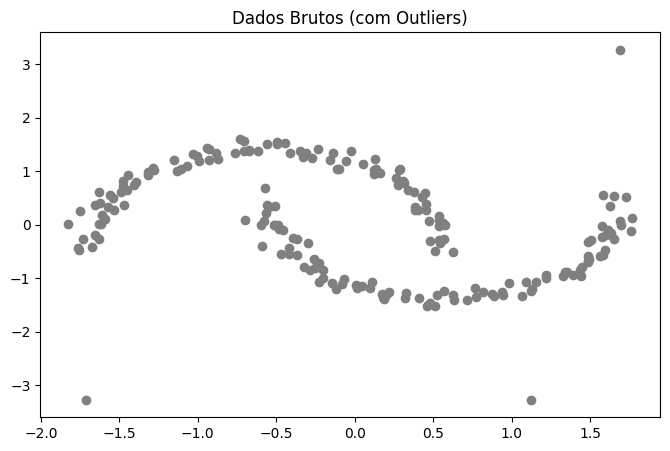

In [2]:
X_moons, y_moons = make_moons(n_samples=200, noise=0.05, random_state=42)

outliers = np.array([
    [2, 2],      # Outlier 1
    [-1, -1.5],  # Outlier 2
    [1.5, -1.5]  # Outlier 3
])

X_full = np.vstack([X_moons, outliers])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

print(f"Dados criados com {len(X_full)} pontos (incluindo {len(outliers)} outliers).")

plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='gray')
plt.title("Dados Brutos (com Outliers)")
plt.show()

In [3]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# DBScan (Robusto a Outliers)

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

print(f"Clusters encontrados pelo K-Means: {np.unique(kmeans_labels)}")
print(f"Clusters encontrados pelo DBScan: {np.unique(dbscan_labels)} (Onde -1 = Ruído/Outlier)")

Clusters encontrados pelo K-Means: [0 1]
Clusters encontrados pelo DBScan: [-1  0  1] (Onde -1 = Ruído/Outlier)


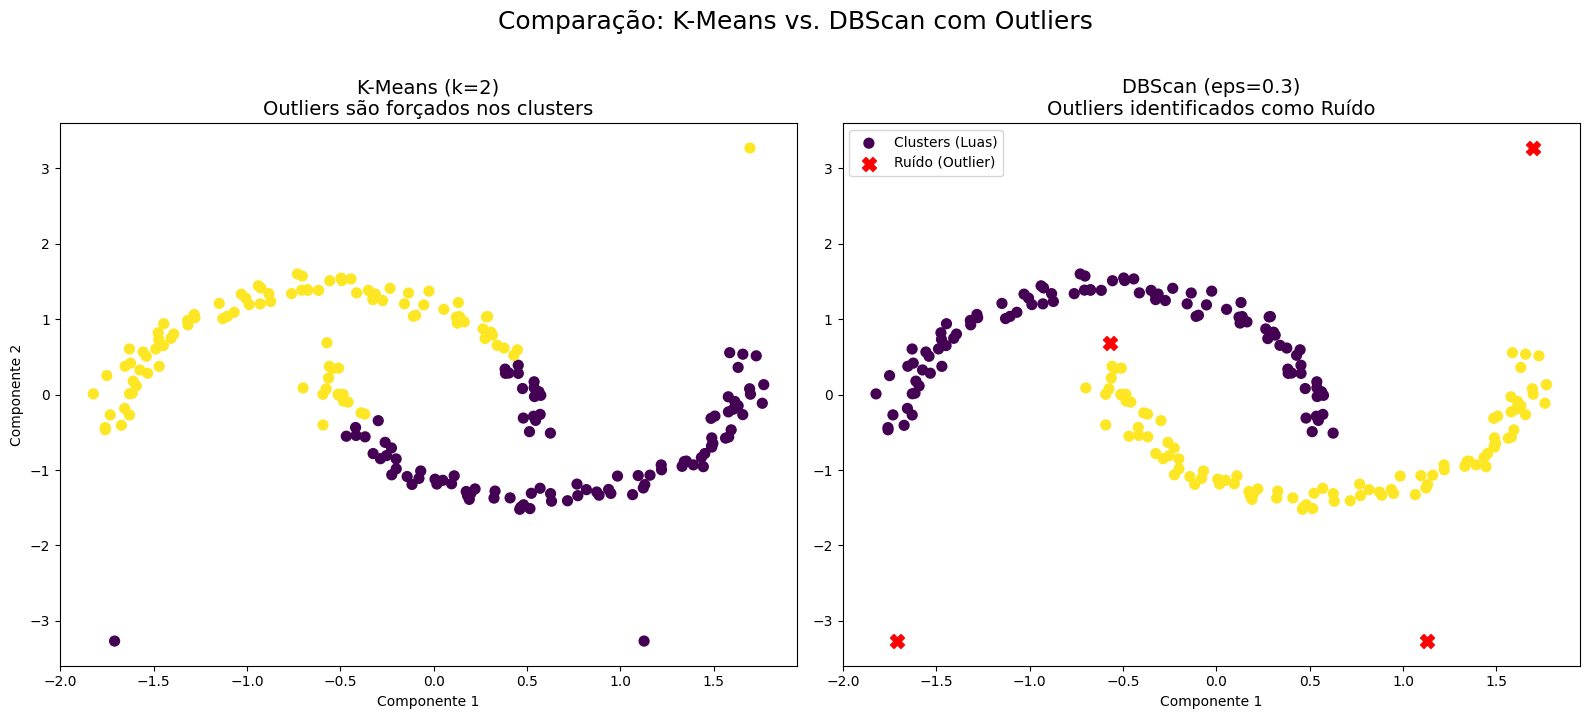

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Gráfico K-Means
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50)
axes[0].set_title(f'K-Means (k=2)\nOutliers são forçados nos clusters', fontsize=14)
axes[0].set_xlabel('Componente 1')
axes[0].set_ylabel('Componente 2')

# Gráfico DBScan
df_dbscan = pd.DataFrame(X_scaled, columns=['PCA1', 'PCA2'])
df_dbscan['cluster'] = dbscan_labels

clustered = df_dbscan[df_dbscan['cluster'] > -1]
noise = df_dbscan[df_dbscan['cluster'] == -1]

axes[1].scatter(clustered['PCA1'], clustered['PCA2'], c=clustered['cluster'], cmap='viridis', s=50, label='Clusters (Luas)')
axes[1].scatter(noise['PCA1'], noise['PCA2'], c='red', s=100, marker='X', label='Ruído (Outlier)')

axes[1].set_title(f'DBScan (eps=0.3)\nOutliers identificados como Ruído', fontsize=14)
axes[1].set_xlabel('Componente 1')
axes[1].legend()

plt.suptitle('Comparação: K-Means vs. DBScan com Outliers', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

## Conclusão do Exemplo

* **K-Means (Gráfico da Esquerda):**
    * Como esperado, ele falhou. Ele não apenas dividiu as "luas" de forma estranha (porque tenta criar grupos esféricos), mas o mais importante: **ele forçou os 3 outliers a pertencerem a um cluster.**
    * Note como o outlier no canto superior direito foi "pintado" de amarelo (cluster 0), e os outros dois foram "pintados" de roxo (cluster 1). Eles **distorceram** o resultado.

* **DBScan (Gráfico da Direita):**
    * Sucesso. O DBScan identificou corretamente as duas "luas" como clusters 0 e 1.
    * O mais importante: ele analisou os 3 pontos de outliers, viu que eles estavam isolados (baixa densidade, sem vizinhos no raio `eps=0.3`), e os marcou como **Ruído** (os 'X' vermelhos, cluster `-1`).
    * Ao fazer isso, os outliers **não tiveram influência** no agrupamento das luas.